# Generate Manuscript Figures (Database statistics)

In [1]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools as it
import scipy.stats as sp_stats

from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
DB_FN_FULL = "../db/massbank__only_normalized_scores.sqlite"
DB_URI_FULL = "file:" + DB_FN_FULL + "?mode=ro"
DB_CONN_FULL_RO = sqlite3.connect(DB_URI_FULL, uri=True)

## Statistics on the Number of (MS2, RT)-tuples per Dataset

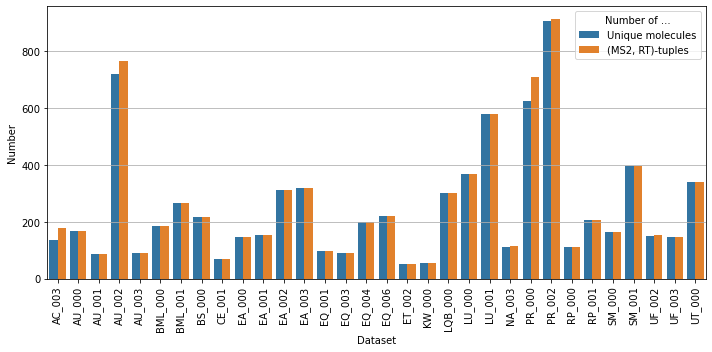

In [9]:
# _query = \
#     "select dataset, " \
#     "       count(distinct molecule) as 'Unique molecules', " \
#     "       count(accession) as '(MS2, RT)-tuples'" \
#     "   from scored_spectra_meta" \
#     "   inner join datasets d on d.name = scored_spectra_meta.dataset " \
#     "   where retention_time >= 3 * column_dead_time_min "\
#     "     and column_type is 'RP'" \
#     "   group by dataset"

_query = \
    "select dataset, " \
    "       count(distinct molecule) as 'Unique molecules', " \
    "       count(accession) as '(MS2, RT)-tuples'" \
    "   from scored_spectra_meta" \
    "   inner join datasets d on d.name = scored_spectra_meta.dataset " \
    "   group by dataset"


# Distribution of the Number of (MS2, RT)-tuples across datasets
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()
sns.barplot(
    data=pd.read_sql(_query, DB_CONN_FULL_RO).melt(id_vars=["dataset"], var_name="Number of ...", value_name="count"),
    x="dataset", y="count", hue="Number of ...", ax=ax
)
_min_n_spec = 150
ax.grid(axis="y")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xlabel("Dataset")
ax.set_ylabel("Number")
plt.tight_layout()
plt.savefig("images/num_examples_per_dataset.png")

In [10]:
pd.read_sql(_query, DB_CONN_FULL_RO)

,dataset,Unique molecules,"(MS2, RT)-tuples"
0,AC_003,136,179
1,AU_000,169,169
2,AU_001,88,88
3,AU_002,719,765
4,AU_003,91,91
5,BML_000,186,186
6,BML_001,267,267
7,BS_000,218,218
8,CE_001,69,69
9,EA_000,146,146
